In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print(datetime.datetime.now())

2023-06-10 07:56:00.554621


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(1035.1738)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 64


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(5.0064)tensor(3.1660)tensor(6.1809)tensor(4.5064)tensor(4.5227)tensor(5.2371)tensor(3.8041)tensor(4.8766)tensor(6.3002)tensor(2.9940)tensor(9.0605)tensor(3.9505)tensor(6.5391)tensor(2.7773)tensor(6.5223)tensor(3.0252)tensor(6.1456)tensor(5.0910)tensor(4.9130)tensor(4.0538)tensor(6.8383)tensor(3.0619)tensor(4.0410)tensor(4.4819)tensor(6.7308)tensor(10.)tensor(5.3068)tensor(3.4337)tensor(2.7016)tensor(3.4779)tensor(7.2859)tensor(4.7868)tensor(6.5982)tensor(6.6346)tensor(4.4811)tensor(4.1557)tensor(4.4894)tensor(7.4692)tensor(7.6733)tensor(5.3015)tensor(4.9974)tensor(3.1285)tensor(5.7615)tensor(4.1155)tensor(4.8227)tensor(3.1116)tensor(2.4913)tensor(5.0236)tensor(6.4476)tensor(2.5029)tensor(2.8974)tensor(3.2591)tensor(7.6543)tensor(4.7653)tensor(3.6951)tensor(5.9228)tensor(3.0604)tensor(5.5585)tensor(5.7530)tensor(3.6314)tensor(6.4033)tensor(2.6283)tensor(4.5347)tensor(4.9641)tensor(2.9059)tensor(2.4797)tensor(5.2730)tensor(2.5797)tensor(5.8641)tensor(6.2405)tensor(5.0658)tensor(3.

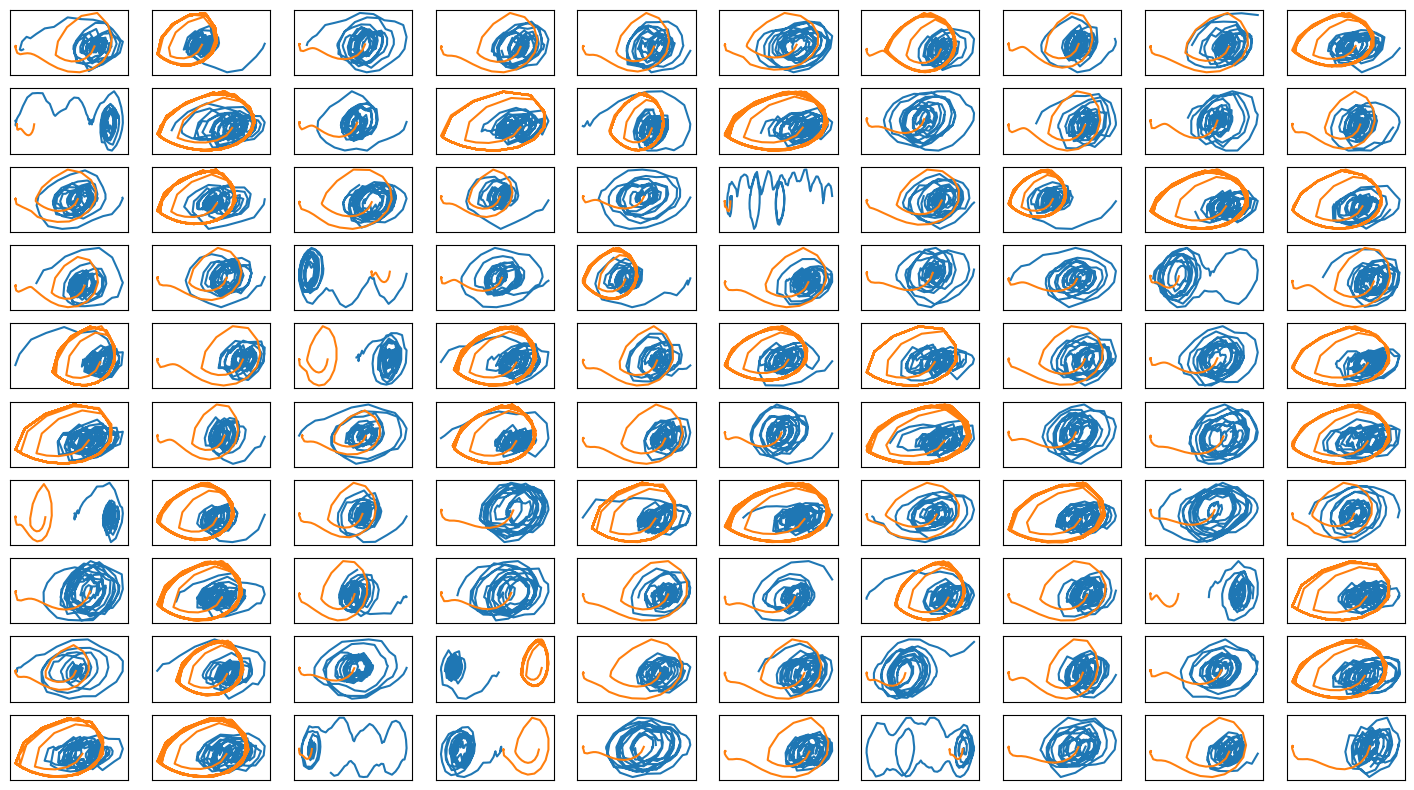

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 1595.58295  validloss 704.37134±0.00000  bestvalidloss 704.37134  last_update 0
train: iter 1  trainloss 923.68178  validloss 457.33588±0.00000  bestvalidloss 457.33588  last_update 0
train: iter 2  trainloss 6819.58462  validloss 357.10146±0.00000  bestvalidloss 357.10146  last_update 0
train: iter 3  trainloss 984.95025  validloss 366.83121±0.00000  bestvalidloss 357.10146  last_update 1
train: iter 4  trainloss 1236.23789  validloss 396.16691±0.00000  bestvalidloss 357.10146  last_update 2
train: iter 5  trainloss 549.78566  validloss 369.80634±0.00000  bestvalidloss 357.10146  last_update 3
train: iter 6  trainloss 392.15358  validloss 349.62255±0.00000  bestvalidloss 349.62255  last_update 0
train: iter 7  trainloss 373.15809  validloss 337.00873±0.00000  bestvalidloss 337.00873  last_update 0
train: iter 8  trainloss 342.65685  validloss 324.80634±0.00000  bestvalidloss 324.80634  last_update 0
train: iter 9  trainloss 316.20125  validl

train: iter 78  trainloss -471.20998  validloss -480.16558±0.00000  bestvalidloss -525.29321  last_update 1
train: iter 79  trainloss -477.58119  validloss -549.45302±0.00000  bestvalidloss -549.45302  last_update 0
train: iter 80  trainloss -463.27070  validloss -536.82074±0.00000  bestvalidloss -549.45302  last_update 1
train: iter 81  trainloss -399.05722  validloss -525.57585±0.00000  bestvalidloss -549.45302  last_update 2
train: iter 82  trainloss -472.45572  validloss -528.08438±0.00000  bestvalidloss -549.45302  last_update 3
train: iter 83  trainloss -484.52200  validloss -541.20849±0.00000  bestvalidloss -549.45302  last_update 4
train: iter 84  trainloss -482.16755  validloss -565.82221±0.00000  bestvalidloss -565.82221  last_update 0
train: iter 85  trainloss -486.08556  validloss -469.85691±0.00000  bestvalidloss -565.82221  last_update 1
train: iter 86  trainloss -351.38913  validloss -535.47152±0.00000  bestvalidloss -565.82221  last_update 2
train: iter 87  trainloss -4

train: iter 155  trainloss -589.76573  validloss -705.43465±0.00000  bestvalidloss -715.58844  last_update 4
train: iter 156  trainloss -604.74701  validloss -694.05515±0.00000  bestvalidloss -715.58844  last_update 5
train: iter 157  trainloss -602.05101  validloss -702.55919±0.00000  bestvalidloss -715.58844  last_update 6
train: iter 158  trainloss -589.62356  validloss -682.66386±0.00000  bestvalidloss -715.58844  last_update 7
train: iter 159  trainloss -622.40780  validloss -702.72121±0.00000  bestvalidloss -715.58844  last_update 8
train: iter 160  trainloss -599.71637  validloss -672.92996±0.00000  bestvalidloss -715.58844  last_update 9
train: iter 161  trainloss -613.53927  validloss -719.54319±0.00000  bestvalidloss -719.54319  last_update 0
train: iter 162  trainloss -607.17462  validloss -654.46625±0.00000  bestvalidloss -719.54319  last_update 1
train: iter 163  trainloss -616.55002  validloss -666.33991±0.00000  bestvalidloss -719.54319  last_update 2
train: iter 164  tr

train: iter 230  trainloss -649.18610  validloss -748.62508±0.00000  bestvalidloss -752.51241  last_update 3
train: iter 231  trainloss -628.48444  validloss -729.63098±0.00000  bestvalidloss -752.51241  last_update 4
train: iter 232  trainloss -651.06012  validloss -701.92548±0.00000  bestvalidloss -752.51241  last_update 5
train: iter 233  trainloss -646.00202  validloss -749.86943±0.00000  bestvalidloss -752.51241  last_update 6
train: iter 234  trainloss -649.69423  validloss -690.65884±0.00000  bestvalidloss -752.51241  last_update 7
train: iter 235  trainloss -637.51290  validloss -712.30876±0.00000  bestvalidloss -752.51241  last_update 8
train: iter 236  trainloss -641.20872  validloss -746.45483±0.00000  bestvalidloss -752.51241  last_update 9
train: iter 237  trainloss -633.81245  validloss -692.37167±0.00000  bestvalidloss -752.51241  last_update 10
train: iter 238  trainloss -637.61466  validloss -712.93489±0.00000  bestvalidloss -752.51241  last_update 11
train: iter 239  

train: iter 305  trainloss -657.19935  validloss -765.40853±0.00000  bestvalidloss -765.40853  last_update 0
train: iter 306  trainloss -673.68434  validloss -741.87436±0.00000  bestvalidloss -765.40853  last_update 1
train: iter 307  trainloss -669.37624  validloss -751.43512±0.00000  bestvalidloss -765.40853  last_update 2
train: iter 308  trainloss -652.75052  validloss -761.16604±0.00000  bestvalidloss -765.40853  last_update 3
train: iter 309  trainloss -659.12141  validloss -724.02418±0.00000  bestvalidloss -765.40853  last_update 4
train: iter 310  trainloss -643.15931  validloss -765.18019±0.00000  bestvalidloss -765.40853  last_update 5
train: iter 311  trainloss -664.02336  validloss -754.37055±0.00000  bestvalidloss -765.40853  last_update 6
train: iter 312  trainloss -675.02160  validloss -748.62756±0.00000  bestvalidloss -765.40853  last_update 7
train: iter 313  trainloss -667.39988  validloss -686.23700±0.00000  bestvalidloss -765.40853  last_update 8
train: iter 314  tr

train: iter 381  trainloss -674.22361  validloss -743.23393±0.00000  bestvalidloss -779.02600  last_update 36
train: iter 382  trainloss -650.51940  validloss -630.26541±0.00000  bestvalidloss -779.02600  last_update 37
train: iter 383  trainloss -676.24331  validloss -734.42092±0.00000  bestvalidloss -779.02600  last_update 38
train: iter 384  trainloss -669.45356  validloss -779.53210±0.00000  bestvalidloss -779.53210  last_update 0
train: iter 385  trainloss -677.20678  validloss -758.11927±0.00000  bestvalidloss -779.53210  last_update 1
train: iter 386  trainloss -643.33192  validloss -763.10160±0.00000  bestvalidloss -779.53210  last_update 2
train: iter 387  trainloss -661.71320  validloss -496.54714±0.00000  bestvalidloss -779.53210  last_update 3
train: iter 388  trainloss -658.15639  validloss -738.00894±0.00000  bestvalidloss -779.53210  last_update 4
train: iter 389  trainloss -659.74375  validloss -671.23365±0.00000  bestvalidloss -779.53210  last_update 5
train: iter 390 

train: iter 456  trainloss -668.56240  validloss -747.82305±0.00000  bestvalidloss -789.04926  last_update 6
train: iter 457  trainloss -674.95167  validloss -704.09999±0.00000  bestvalidloss -789.04926  last_update 7
train: iter 458  trainloss -670.21978  validloss -761.55767±0.00000  bestvalidloss -789.04926  last_update 8
train: iter 459  trainloss -690.20897  validloss -760.05475±0.00000  bestvalidloss -789.04926  last_update 9
train: iter 460  trainloss -681.55889  validloss -753.31118±0.00000  bestvalidloss -789.04926  last_update 10
train: iter 461  trainloss -688.45693  validloss -750.93481±0.00000  bestvalidloss -789.04926  last_update 11
train: iter 462  trainloss -662.19821  validloss -728.08817±0.00000  bestvalidloss -789.04926  last_update 12
train: iter 463  trainloss -682.61242  validloss -778.37856±0.00000  bestvalidloss -789.04926  last_update 13
train: iter 464  trainloss -692.34806  validloss -769.40136±0.00000  bestvalidloss -789.04926  last_update 14
train: iter 46

train: iter 531  trainloss -692.04028  validloss -786.52968±0.00000  bestvalidloss -791.25576  last_update 3
train: iter 532  trainloss -699.74037  validloss -738.70348±0.00000  bestvalidloss -791.25576  last_update 4
train: iter 533  trainloss -703.98252  validloss -761.13573±0.00000  bestvalidloss -791.25576  last_update 5
train: iter 534  trainloss -689.16885  validloss -760.18725±0.00000  bestvalidloss -791.25576  last_update 6
train: iter 535  trainloss -706.64901  validloss -783.32495±0.00000  bestvalidloss -791.25576  last_update 7
train: iter 536  trainloss -698.65615  validloss -731.13188±0.00000  bestvalidloss -791.25576  last_update 8
train: iter 537  trainloss -703.18467  validloss -765.25421±0.00000  bestvalidloss -791.25576  last_update 9
train: iter 538  trainloss -694.45418  validloss -731.48138±0.00000  bestvalidloss -791.25576  last_update 10
train: iter 539  trainloss -668.85456  validloss -781.59030±0.00000  bestvalidloss -791.25576  last_update 11
train: iter 540  

train: iter 606  trainloss -684.35230  validloss -784.01760±0.00000  bestvalidloss -797.22182  last_update 9
train: iter 607  trainloss -689.55079  validloss -666.89953±0.00000  bestvalidloss -797.22182  last_update 10
train: iter 608  trainloss -715.47371  validloss -778.04201±0.00000  bestvalidloss -797.22182  last_update 11
train: iter 609  trainloss -701.70181  validloss -786.17195±0.00000  bestvalidloss -797.22182  last_update 12
train: iter 610  trainloss -711.45611  validloss -785.46083±0.00000  bestvalidloss -797.22182  last_update 13
train: iter 611  trainloss -665.84389  validloss -798.63110±0.00000  bestvalidloss -798.63110  last_update 0
train: iter 612  trainloss -706.17754  validloss -743.82378±0.00000  bestvalidloss -798.63110  last_update 1
train: iter 613  trainloss -709.12313  validloss -781.47626±0.00000  bestvalidloss -798.63110  last_update 2
train: iter 614  trainloss -712.10588  validloss -785.49548±0.00000  bestvalidloss -798.63110  last_update 3
train: iter 615

train: iter 682  trainloss -687.17833  validloss -784.19792±0.00000  bestvalidloss -799.76686  last_update 7
train: iter 683  trainloss -709.61431  validloss -754.28658±0.00000  bestvalidloss -799.76686  last_update 8
train: iter 684  trainloss -702.19148  validloss -773.11857±0.00000  bestvalidloss -799.76686  last_update 9
train: iter 685  trainloss -700.71374  validloss -721.90888±0.00000  bestvalidloss -799.76686  last_update 10
train: iter 686  trainloss -680.50867  validloss -762.46255±0.00000  bestvalidloss -799.76686  last_update 11
train: iter 687  trainloss -715.46227  validloss -791.65773±0.00000  bestvalidloss -799.76686  last_update 12
train: iter 688  trainloss -714.48552  validloss -792.64773±0.00000  bestvalidloss -799.76686  last_update 13
train: iter 689  trainloss -715.69024  validloss -750.00684±0.00000  bestvalidloss -799.76686  last_update 14
train: iter 690  trainloss -719.04152  validloss -797.04871±0.00000  bestvalidloss -799.76686  last_update 15
train: iter 6

train: iter 757  trainloss -725.17778  validloss -805.40276±0.00000  bestvalidloss -805.40276  last_update 0
train: iter 758  trainloss -707.11783  validloss -804.09344±0.00000  bestvalidloss -805.40276  last_update 1
train: iter 759  trainloss -710.01424  validloss -750.86775±0.00000  bestvalidloss -805.40276  last_update 2
train: iter 760  trainloss -704.27639  validloss -791.44683±0.00000  bestvalidloss -805.40276  last_update 3
train: iter 761  trainloss -723.20803  validloss -803.86601±0.00000  bestvalidloss -805.40276  last_update 4
train: iter 762  trainloss -723.94174  validloss -786.95027±0.00000  bestvalidloss -805.40276  last_update 5
train: iter 763  trainloss -719.02080  validloss -794.30594±0.00000  bestvalidloss -805.40276  last_update 6
train: iter 764  trainloss -709.04344  validloss -782.90777±0.00000  bestvalidloss -805.40276  last_update 7
train: iter 765  trainloss -715.46279  validloss -783.18554±0.00000  bestvalidloss -805.40276  last_update 8
train: iter 766  tr

train: iter 832  trainloss -723.92728  validloss -788.77925±0.00000  bestvalidloss -809.85125  last_update 19
train: iter 833  trainloss -716.00770  validloss -744.55111±0.00000  bestvalidloss -809.85125  last_update 20
train: iter 834  trainloss -721.86779  validloss -781.77329±0.00000  bestvalidloss -809.85125  last_update 21
train: iter 835  trainloss -717.27462  validloss -786.05603±0.00000  bestvalidloss -809.85125  last_update 22
train: iter 836  trainloss -722.32108  validloss -750.36174±0.00000  bestvalidloss -809.85125  last_update 23
train: iter 837  trainloss -714.94372  validloss -770.46615±0.00000  bestvalidloss -809.85125  last_update 24
train: iter 838  trainloss -723.11600  validloss -776.45685±0.00000  bestvalidloss -809.85125  last_update 25
train: iter 839  trainloss -720.78480  validloss -762.44936±0.00000  bestvalidloss -809.85125  last_update 26
train: iter 840  trainloss -714.78743  validloss -792.60019±0.00000  bestvalidloss -809.85125  last_update 27
train: ite

train: iter 907  trainloss -729.08324  validloss -817.35121±0.00000  bestvalidloss -817.35121  last_update 0
train: iter 908  trainloss -732.57565  validloss -794.48534±0.00000  bestvalidloss -817.35121  last_update 1
train: iter 909  trainloss -741.66579  validloss -780.38730±0.00000  bestvalidloss -817.35121  last_update 2
train: iter 910  trainloss -704.82688  validloss -683.53282±0.00000  bestvalidloss -817.35121  last_update 3
train: iter 911  trainloss -738.25471  validloss -792.58432±0.00000  bestvalidloss -817.35121  last_update 4
train: iter 912  trainloss -735.18746  validloss -792.08636±0.00000  bestvalidloss -817.35121  last_update 5
train: iter 913  trainloss -727.50798  validloss -809.31050±0.00000  bestvalidloss -817.35121  last_update 6
train: iter 914  trainloss -740.38816  validloss -743.48875±0.00000  bestvalidloss -817.35121  last_update 7
train: iter 915  trainloss -734.57404  validloss -810.46555±0.00000  bestvalidloss -817.35121  last_update 8
train: iter 916  tr

train: iter 983  trainloss -763.39345  validloss -829.94306±0.00000  bestvalidloss -848.76268  last_update 8
train: iter 984  trainloss -750.80515  validloss -801.04556±0.00000  bestvalidloss -848.76268  last_update 9
train: iter 985  trainloss -780.04284  validloss -825.20272±0.00000  bestvalidloss -848.76268  last_update 10
train: iter 986  trainloss -761.66721  validloss -844.25619±0.00000  bestvalidloss -848.76268  last_update 11
train: iter 987  trainloss -758.12020  validloss -852.87785±0.00000  bestvalidloss -852.87785  last_update 0
train: iter 988  trainloss -777.74650  validloss -844.52510±0.00000  bestvalidloss -852.87785  last_update 1
train: iter 989  trainloss -766.07518  validloss -807.75826±0.00000  bestvalidloss -852.87785  last_update 2
train: iter 990  trainloss -767.35283  validloss -831.56945±0.00000  bestvalidloss -852.87785  last_update 3
train: iter 991  trainloss -759.15600  validloss -858.76969±0.00000  bestvalidloss -858.76969  last_update 0
train: iter 992  

train: iter 1058  trainloss -815.28031  validloss -862.20872±0.00000  bestvalidloss -889.61099  last_update 8
train: iter 1059  trainloss -819.44940  validloss -876.48399±0.00000  bestvalidloss -889.61099  last_update 9
train: iter 1060  trainloss -830.44499  validloss -857.10051±0.00000  bestvalidloss -889.61099  last_update 10
train: iter 1061  trainloss -820.59580  validloss -878.55259±0.00000  bestvalidloss -889.61099  last_update 11
train: iter 1062  trainloss -809.40479  validloss -821.74252±0.00000  bestvalidloss -889.61099  last_update 12
train: iter 1063  trainloss -786.85620  validloss -781.56647±0.00000  bestvalidloss -889.61099  last_update 13
train: iter 1064  trainloss -824.71685  validloss -803.46077±0.00000  bestvalidloss -889.61099  last_update 14
train: iter 1065  trainloss -828.96864  validloss -859.97507±0.00000  bestvalidloss -889.61099  last_update 15
train: iter 1066  trainloss -812.23019  validloss -878.99810±0.00000  bestvalidloss -889.61099  last_update 16
tra

train: iter 1133  trainloss -864.41294  validloss -871.08053±0.00000  bestvalidloss -905.82712  last_update 11
train: iter 1134  trainloss -848.24189  validloss -837.94597±0.00000  bestvalidloss -905.82712  last_update 12
train: iter 1135  trainloss -842.49403  validloss -899.13394±0.00000  bestvalidloss -905.82712  last_update 13
train: iter 1136  trainloss -841.10556  validloss -871.49758±0.00000  bestvalidloss -905.82712  last_update 14
train: iter 1137  trainloss -857.81905  validloss -911.14925±0.00000  bestvalidloss -911.14925  last_update 0
train: iter 1138  trainloss -866.78460  validloss -881.21702±0.00000  bestvalidloss -911.14925  last_update 1
train: iter 1139  trainloss -852.38429  validloss -886.52816±0.00000  bestvalidloss -911.14925  last_update 2
train: iter 1140  trainloss -865.68147  validloss -901.53136±0.00000  bestvalidloss -911.14925  last_update 3
train: iter 1141  trainloss -863.58174  validloss -899.39862±0.00000  bestvalidloss -911.14925  last_update 4
train:

train: iter 1209  trainloss -885.39460  validloss -940.85745±0.00000  bestvalidloss -942.57999  last_update 12
train: iter 1210  trainloss -878.62716  validloss -928.01150±0.00000  bestvalidloss -942.57999  last_update 13
train: iter 1211  trainloss -879.25805  validloss -932.97931±0.00000  bestvalidloss -942.57999  last_update 14
train: iter 1212  trainloss -860.98288  validloss -895.87328±0.00000  bestvalidloss -942.57999  last_update 15
train: iter 1213  trainloss -872.30687  validloss -929.81433±0.00000  bestvalidloss -942.57999  last_update 16
train: iter 1214  trainloss -877.94816  validloss -911.26421±0.00000  bestvalidloss -942.57999  last_update 17
train: iter 1215  trainloss -882.94021  validloss -930.41814±0.00000  bestvalidloss -942.57999  last_update 18
train: iter 1216  trainloss -884.79774  validloss -886.22539±0.00000  bestvalidloss -942.57999  last_update 19
train: iter 1217  trainloss -878.26978  validloss -890.67171±0.00000  bestvalidloss -942.57999  last_update 20
t

train: iter 1284  trainloss -893.98139  validloss -943.61706±0.00000  bestvalidloss -966.68078  last_update 14
train: iter 1285  trainloss -908.74679  validloss -945.26710±0.00000  bestvalidloss -966.68078  last_update 15
train: iter 1286  trainloss -883.35783  validloss -940.20330±0.00000  bestvalidloss -966.68078  last_update 16
train: iter 1287  trainloss -875.04726  validloss -896.98415±0.00000  bestvalidloss -966.68078  last_update 17
train: iter 1288  trainloss -906.32657  validloss -946.95613±0.00000  bestvalidloss -966.68078  last_update 18
train: iter 1289  trainloss -825.84346  validloss -942.22892±0.00000  bestvalidloss -966.68078  last_update 19
train: iter 1290  trainloss -900.23273  validloss -942.86175±0.00000  bestvalidloss -966.68078  last_update 20
train: iter 1291  trainloss -907.10791  validloss -933.29082±0.00000  bestvalidloss -966.68078  last_update 21
train: iter 1292  trainloss -867.63904  validloss -899.74299±0.00000  bestvalidloss -966.68078  last_update 22
t

train: iter 1359  trainloss -898.37282  validloss -812.54406±0.00000  bestvalidloss -970.72388  last_update 30
train: iter 1360  trainloss -893.96187  validloss -967.20480±0.00000  bestvalidloss -970.72388  last_update 31
train: iter 1361  trainloss -890.77330  validloss -955.84916±0.00000  bestvalidloss -970.72388  last_update 32
train: iter 1362  trainloss -899.85288  validloss -885.61971±0.00000  bestvalidloss -970.72388  last_update 33
train: iter 1363  trainloss -882.29126  validloss -961.98743±0.00000  bestvalidloss -970.72388  last_update 34
train: iter 1364  trainloss -908.44125  validloss -958.96436±0.00000  bestvalidloss -970.72388  last_update 35
train: iter 1365  trainloss -918.49911  validloss -956.94079±0.00000  bestvalidloss -970.72388  last_update 36
train: iter 1366  trainloss -906.79092  validloss -915.72726±0.00000  bestvalidloss -970.72388  last_update 37
train: iter 1367  trainloss -899.73190  validloss -949.93026±0.00000  bestvalidloss -970.72388  last_update 38
t

train: iter 1434  trainloss -918.13020  validloss -880.22058±0.00000  bestvalidloss -978.87517  last_update 14
train: iter 1435  trainloss -908.06170  validloss -906.28589±0.00000  bestvalidloss -978.87517  last_update 15
train: iter 1436  trainloss -902.49516  validloss -855.67607±0.00000  bestvalidloss -978.87517  last_update 16
train: iter 1437  trainloss -925.75015  validloss -913.85686±0.00000  bestvalidloss -978.87517  last_update 17
train: iter 1438  trainloss -917.73564  validloss -942.73599±0.00000  bestvalidloss -978.87517  last_update 18
train: iter 1439  trainloss -905.84465  validloss -938.56600±0.00000  bestvalidloss -978.87517  last_update 19
train: iter 1440  trainloss -906.63954  validloss -933.21026±0.00000  bestvalidloss -978.87517  last_update 20
train: iter 1441  trainloss -871.01668  validloss -949.57068±0.00000  bestvalidloss -978.87517  last_update 21
train: iter 1442  trainloss -918.20016  validloss -955.70535±0.00000  bestvalidloss -978.87517  last_update 22
t

train: iter 1509  trainloss -935.25001  validloss -864.91629±0.00000  bestvalidloss -991.97846  last_update 22
train: iter 1510  trainloss -936.49170  validloss -943.56948±0.00000  bestvalidloss -991.97846  last_update 23
train: iter 1511  trainloss -927.35312  validloss -930.61868±0.00000  bestvalidloss -991.97846  last_update 24
train: iter 1512  trainloss -912.69578  validloss -969.56575±0.00000  bestvalidloss -991.97846  last_update 25
train: iter 1513  trainloss -918.87600  validloss -946.74873±0.00000  bestvalidloss -991.97846  last_update 26
train: iter 1514  trainloss -906.20757  validloss -957.41293±0.00000  bestvalidloss -991.97846  last_update 27
train: iter 1515  trainloss -931.84992  validloss -970.43064±0.00000  bestvalidloss -991.97846  last_update 28
train: iter 1516  trainloss -915.72956  validloss -970.37574±0.00000  bestvalidloss -991.97846  last_update 29
train: iter 1517  trainloss -906.84771  validloss -968.20648±0.00000  bestvalidloss -991.97846  last_update 30
t

train: iter 1583  trainloss -932.27863  validloss -986.37978±0.00000  bestvalidloss -991.97846  last_update 96
train: iter 1584  trainloss -943.73255  validloss -961.82573±0.00000  bestvalidloss -991.97846  last_update 97
train: iter 1585  trainloss -928.99770  validloss -938.05925±0.00000  bestvalidloss -991.97846  last_update 98
train: iter 1586  trainloss -922.05674  validloss -974.20308±0.00000  bestvalidloss -991.97846  last_update 99
train: iter 1587  trainloss -899.81549  validloss -916.47999±0.00000  bestvalidloss -991.97846  last_update 100
train: fin
penalty_target_min tensor(-6.1621) penalty_target_max tensor(34.3852)


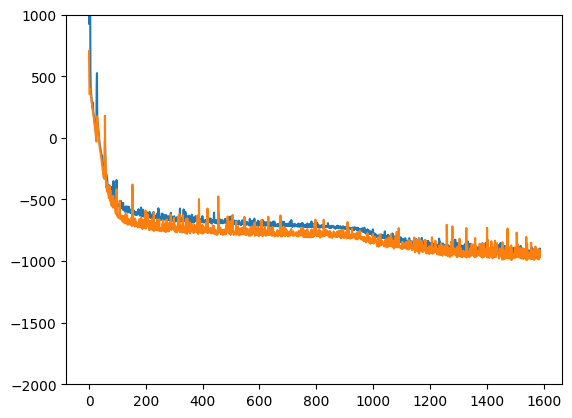

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


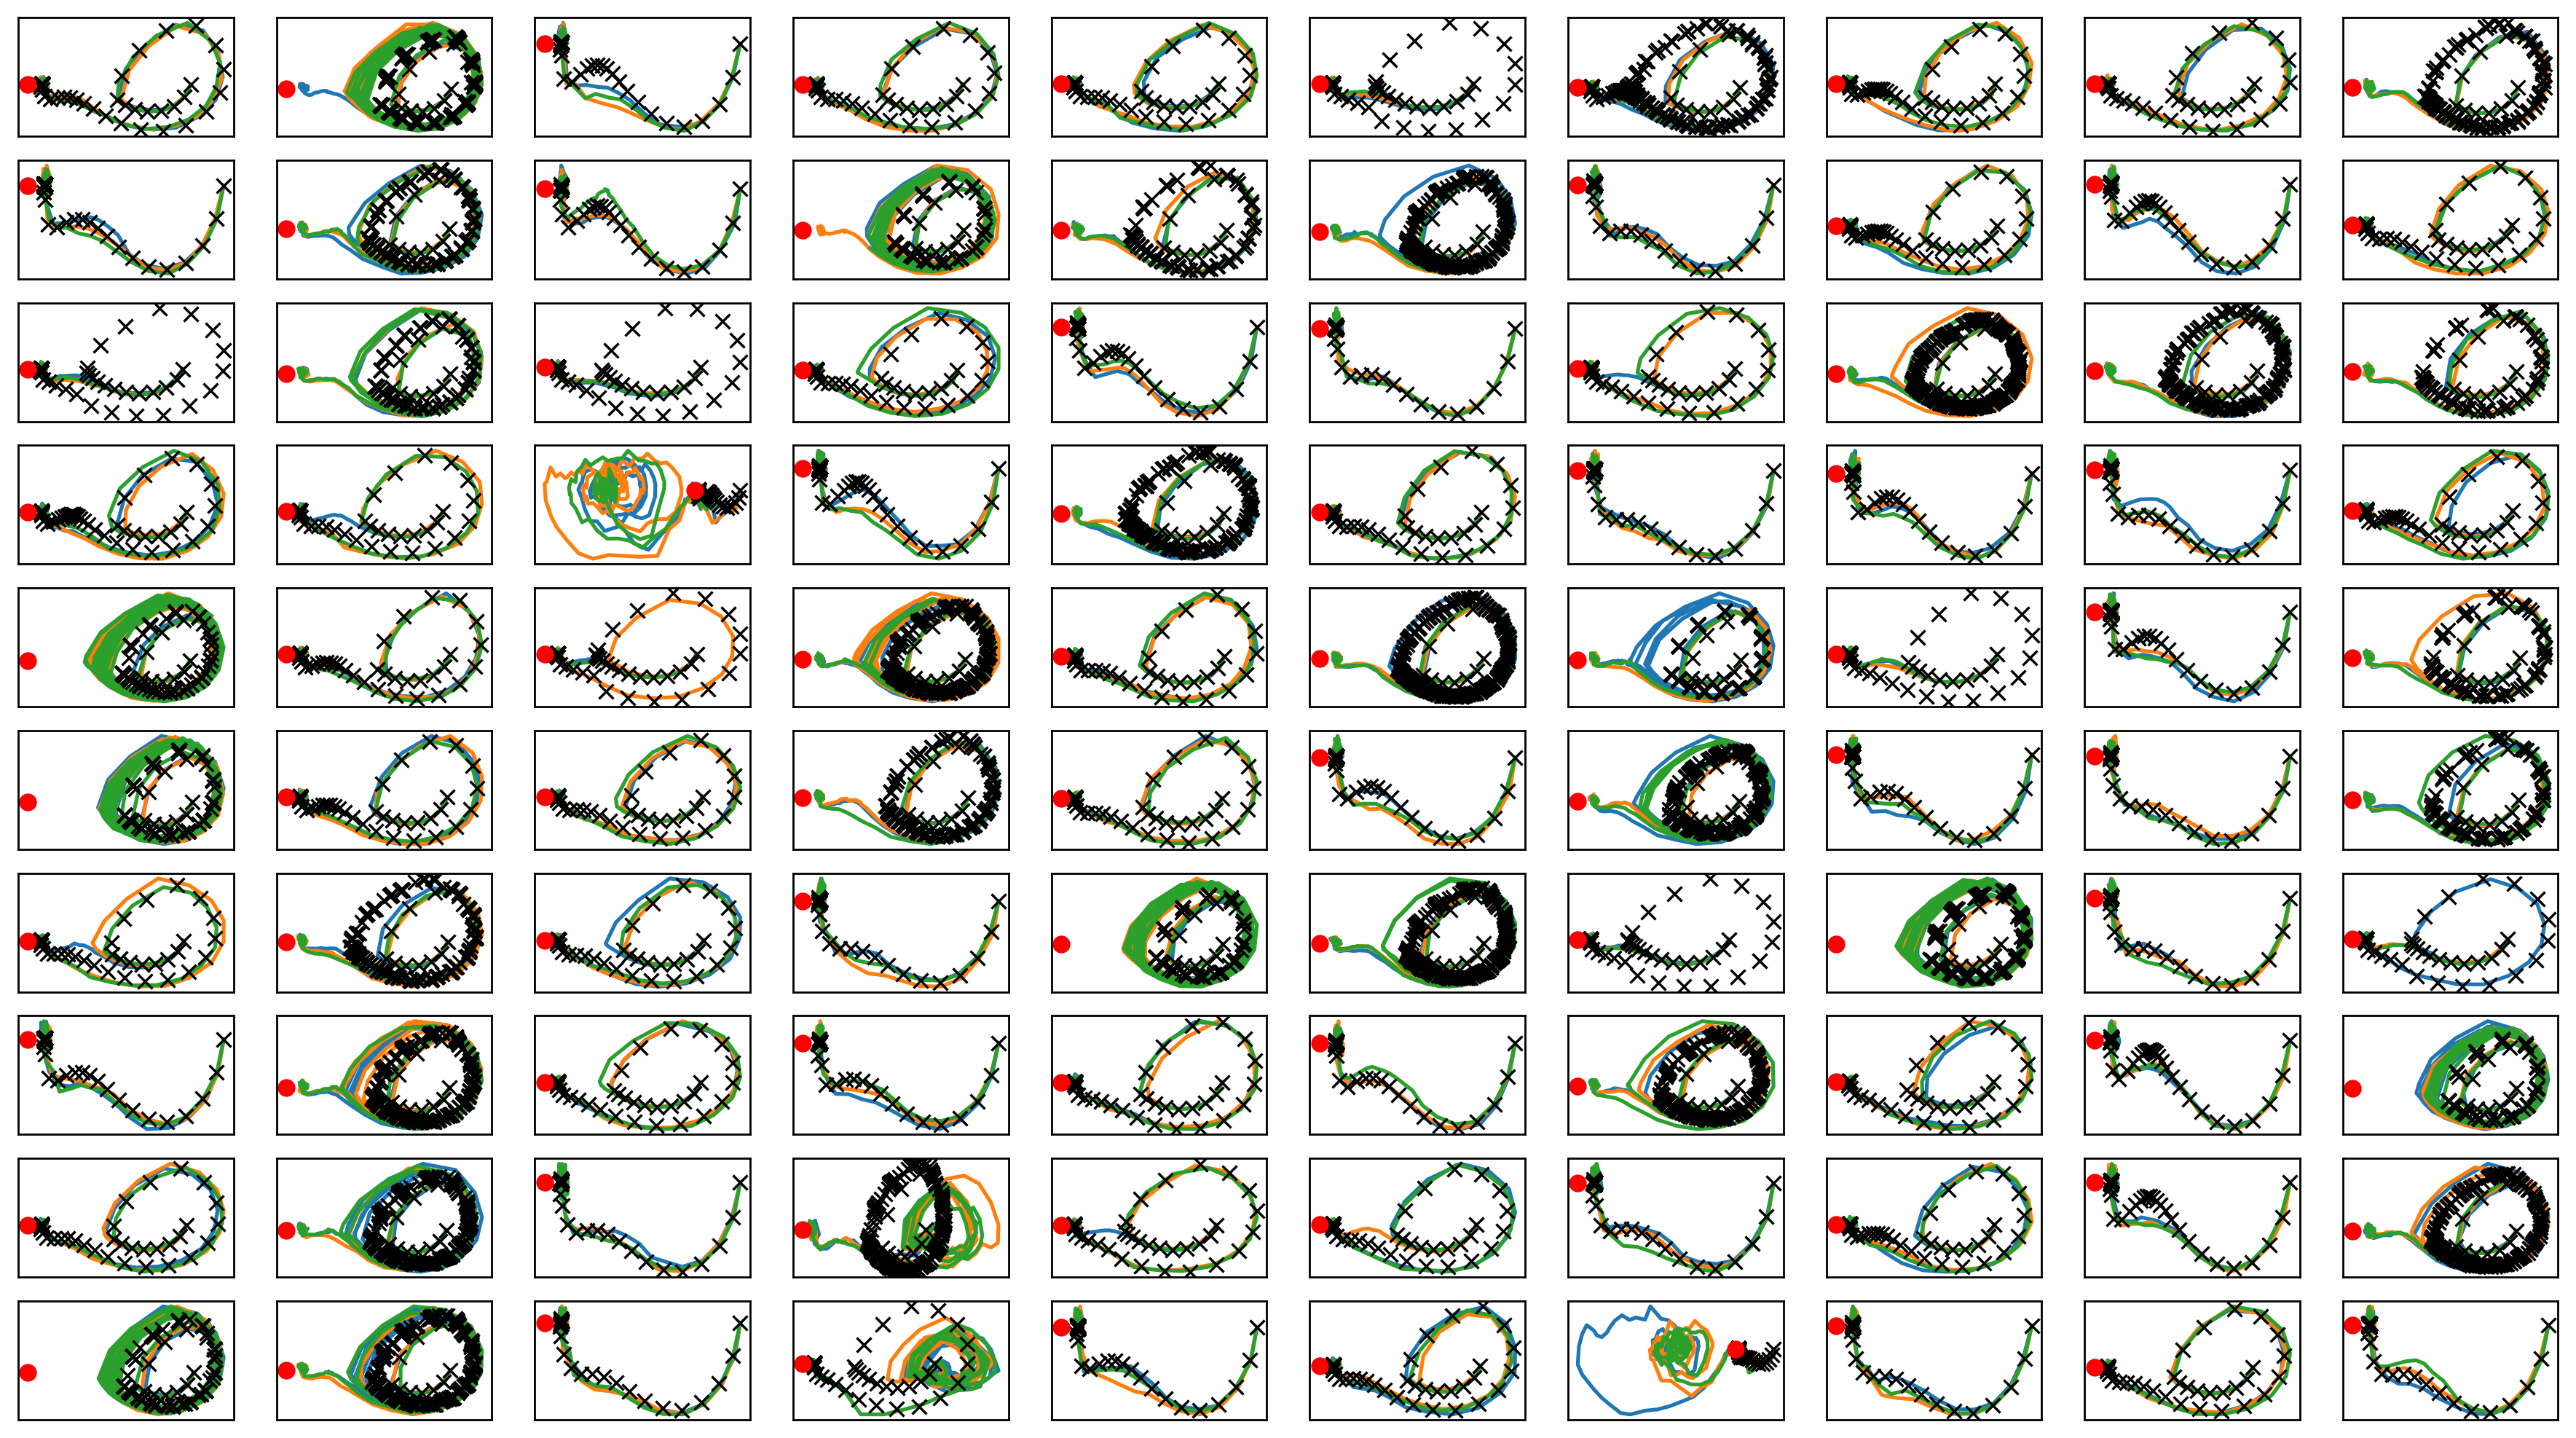

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

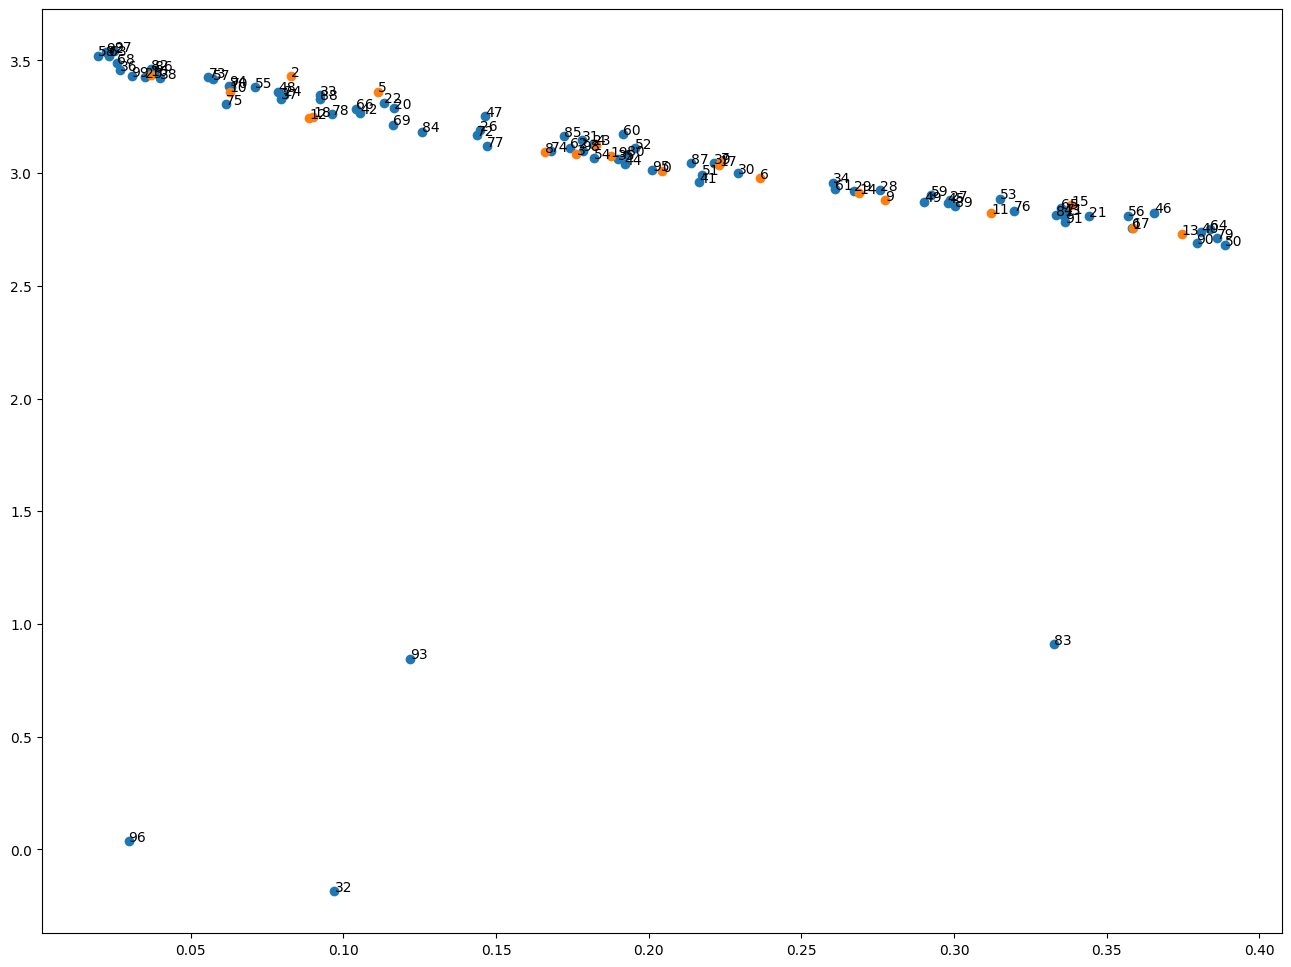

[0.20433104 0.35851724 0.08289715 0.17632394 0.18273329 0.11139491
 0.23634513 0.22354164 0.16604048 0.27725517 0.0627471  0.31212591
 0.08878315 0.37455346 0.26895347 0.33830035 0.0368868  0.2231363
 0.0900218  0.1875761  0.11671711 0.34421357 0.11339514 0.18184883
 0.08055148 0.03489175 0.14487048 0.29869849 0.27567217 0.26725392
 0.22911755 0.17805802 0.09707017 0.09223368 0.26019074 0.19003544
 0.02678777 0.07959041 0.04004174 0.22131109 0.3808405  0.21640787
 0.10555467 0.33567722 0.19209598 0.29790093 0.36559011 0.14637623
 0.07855223 0.29026785 0.38883935 0.21743773 0.1955493  0.31504728
 0.18211174 0.07088535 0.35695728 0.05733293 0.01964357 0.29228325
 0.19159132 0.26088925 0.17420822 0.0230926  0.38388287 0.33498497
 0.10413803 0.35822813 0.02586928 0.11634898 0.06321346 0.33656785
 0.14364301 0.05578685 0.1678331  0.06149608 0.31958573 0.14708119
 0.09622813 0.38609126 0.19299882 0.33347515 0.03685264 0.33270444
 0.1258612  0.17232601 0.03822673 0.21389395 0.09233451 0.30041

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


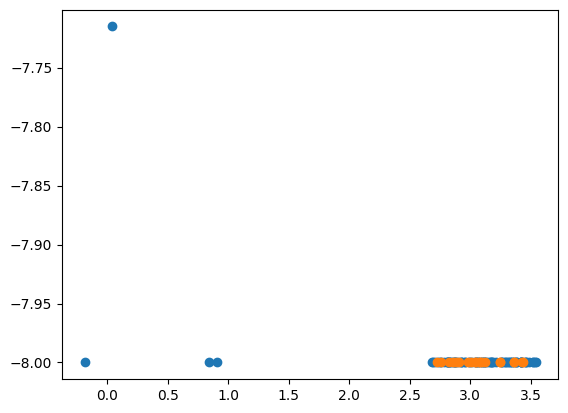

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 5.30936  validloss 5.66974±0.00000  bestvalidloss 5.66974  last_update 0
train: iter 1  trainloss 4.83930  validloss 5.13838±0.00000  bestvalidloss 5.13838  last_update 0
train: iter 2  trainloss 4.46096  validloss 4.69913±0.00000  bestvalidloss 4.69913  last_update 0
train: iter 3  trainloss 4.12133  validloss 4.32717±0.00000  bestvalidloss 4.32717  last_update 0
train: iter 4  trainloss 3.85224  validloss 4.04875±0.00000  bestvalidloss 4.04875  last_update 0
train: iter 5  trainloss 3.61839  validloss 3.77844±0.00000  bestvalidloss 3.77844  last_update 0
train: iter 6  trainloss 3.40465  validloss 3.54919±0.00000  bestvalidloss 3.54919  last_update 0
train: iter 7  trainloss 3.22665  validloss 3.34844±0.00000  bestvalidloss 3.34844  last_update 0
train: iter 8  trainloss 3.07200  validloss 3.16337±0.00000  bestvalidloss 3.16337  last_update 0
train: iter 9  trainloss 2.93688  validloss 3.02539±0.00000  bestvalidloss 3.02539  last_update 0
train: iter 10  trai

train: iter 84  trainloss 1.01587  validloss 0.70945±0.00000  bestvalidloss 0.70945  last_update 0
train: iter 85  trainloss 1.01252  validloss 0.69661±0.00000  bestvalidloss 0.69661  last_update 0
train: iter 86  trainloss 1.00986  validloss 0.69489±0.00000  bestvalidloss 0.69489  last_update 0
train: iter 87  trainloss 1.01304  validloss 0.69280±0.00000  bestvalidloss 0.69280  last_update 0
train: iter 88  trainloss 1.00618  validloss 0.69135±0.00000  bestvalidloss 0.69135  last_update 0
train: iter 89  trainloss 1.00583  validloss 0.68998±0.00000  bestvalidloss 0.68998  last_update 0
train: iter 90  trainloss 1.00670  validloss 0.68247±0.00000  bestvalidloss 0.68247  last_update 0
train: iter 91  trainloss 1.00814  validloss 0.67720±0.00000  bestvalidloss 0.67720  last_update 0
train: iter 92  trainloss 1.00107  validloss 0.67616±0.00000  bestvalidloss 0.67616  last_update 0
train: iter 93  trainloss 1.00031  validloss 0.67165±0.00000  bestvalidloss 0.67165  last_update 0
train: ite

train: iter 168  trainloss 0.98717  validloss 0.56769±0.00000  bestvalidloss 0.56719  last_update 5
train: iter 169  trainloss 0.99096  validloss 0.56751±0.00000  bestvalidloss 0.56719  last_update 6
train: iter 170  trainloss 0.99067  validloss 0.57197±0.00000  bestvalidloss 0.56719  last_update 7
train: iter 171  trainloss 0.98476  validloss 0.56709±0.00000  bestvalidloss 0.56709  last_update 0
train: iter 172  trainloss 0.99203  validloss 0.56465±0.00000  bestvalidloss 0.56465  last_update 0
train: iter 173  trainloss 0.98568  validloss 0.56926±0.00000  bestvalidloss 0.56465  last_update 1
train: iter 174  trainloss 0.99512  validloss 0.56349±0.00000  bestvalidloss 0.56349  last_update 0
train: iter 175  trainloss 0.98634  validloss 0.57031±0.00000  bestvalidloss 0.56349  last_update 1
train: iter 176  trainloss 0.98829  validloss 0.56624±0.00000  bestvalidloss 0.56349  last_update 2
train: iter 177  trainloss 0.99077  validloss 0.56768±0.00000  bestvalidloss 0.56349  last_update 3


train: iter 253  trainloss 0.98946  validloss 0.55295±0.00000  bestvalidloss 0.54649  last_update 3
train: iter 254  trainloss 0.98665  validloss 0.55314±0.00000  bestvalidloss 0.54649  last_update 4
train: iter 255  trainloss 0.98005  validloss 0.55523±0.00000  bestvalidloss 0.54649  last_update 5
train: iter 256  trainloss 0.98970  validloss 0.55136±0.00000  bestvalidloss 0.54649  last_update 6
train: iter 257  trainloss 0.98423  validloss 0.55208±0.00000  bestvalidloss 0.54649  last_update 7
train: iter 258  trainloss 0.98672  validloss 0.55240±0.00000  bestvalidloss 0.54649  last_update 8
train: iter 259  trainloss 0.98581  validloss 0.54905±0.00000  bestvalidloss 0.54649  last_update 9
train: iter 260  trainloss 0.99050  validloss 0.54811±0.00000  bestvalidloss 0.54649  last_update 10
train: iter 261  trainloss 0.99053  validloss 0.55300±0.00000  bestvalidloss 0.54649  last_update 11
train: iter 262  trainloss 0.99165  validloss 0.55113±0.00000  bestvalidloss 0.54649  last_update 

train: iter 337  trainloss 0.99240  validloss 0.55341±0.00000  bestvalidloss 0.54412  last_update 11
train: iter 338  trainloss 0.98769  validloss 0.55424±0.00000  bestvalidloss 0.54412  last_update 12
train: iter 339  trainloss 0.98717  validloss 0.55046±0.00000  bestvalidloss 0.54412  last_update 13
train: iter 340  trainloss 0.99553  validloss 0.55256±0.00000  bestvalidloss 0.54412  last_update 14
train: iter 341  trainloss 0.98947  validloss 0.54766±0.00000  bestvalidloss 0.54412  last_update 15
train: iter 342  trainloss 0.98864  validloss 0.54793±0.00000  bestvalidloss 0.54412  last_update 16
train: iter 343  trainloss 0.98594  validloss 0.55340±0.00000  bestvalidloss 0.54412  last_update 17
train: iter 344  trainloss 0.99098  validloss 0.55211±0.00000  bestvalidloss 0.54412  last_update 18
train: iter 345  trainloss 0.98684  validloss 0.54957±0.00000  bestvalidloss 0.54412  last_update 19
train: iter 346  trainloss 0.98949  validloss 0.54903±0.00000  bestvalidloss 0.54412  last_

train: iter 420  trainloss 0.98566  validloss 0.54730±0.00000  bestvalidloss 0.54253  last_update 9
train: iter 421  trainloss 0.98890  validloss 0.54931±0.00000  bestvalidloss 0.54253  last_update 10
train: iter 422  trainloss 0.98324  validloss 0.54682±0.00000  bestvalidloss 0.54253  last_update 11
train: iter 423  trainloss 0.98309  validloss 0.54378±0.00000  bestvalidloss 0.54253  last_update 12
train: iter 424  trainloss 0.98481  validloss 0.54425±0.00000  bestvalidloss 0.54253  last_update 13
train: iter 425  trainloss 0.99113  validloss 0.54668±0.00000  bestvalidloss 0.54253  last_update 14
train: iter 426  trainloss 0.98168  validloss 0.55278±0.00000  bestvalidloss 0.54253  last_update 15
train: iter 427  trainloss 0.99086  validloss 0.54762±0.00000  bestvalidloss 0.54253  last_update 16
train: iter 428  trainloss 0.98454  validloss 0.54867±0.00000  bestvalidloss 0.54253  last_update 17
train: iter 429  trainloss 0.98653  validloss 0.55167±0.00000  bestvalidloss 0.54253  last_u

train: iter 505  trainloss 0.98492  validloss 0.54625±0.00000  bestvalidloss 0.54077  last_update 50
train: iter 506  trainloss 0.97730  validloss 0.54799±0.00000  bestvalidloss 0.54077  last_update 51
train: iter 507  trainloss 0.98553  validloss 0.54401±0.00000  bestvalidloss 0.54077  last_update 52
train: iter 508  trainloss 0.99221  validloss 0.55130±0.00000  bestvalidloss 0.54077  last_update 53
train: iter 509  trainloss 0.98937  validloss 0.54387±0.00000  bestvalidloss 0.54077  last_update 54
train: iter 510  trainloss 0.98636  validloss 0.54712±0.00000  bestvalidloss 0.54077  last_update 55
train: iter 511  trainloss 0.98707  validloss 0.55004±0.00000  bestvalidloss 0.54077  last_update 56
train: iter 512  trainloss 0.98476  validloss 0.54665±0.00000  bestvalidloss 0.54077  last_update 57
train: iter 513  trainloss 0.98406  validloss 0.54675±0.00000  bestvalidloss 0.54077  last_update 58
train: iter 514  trainloss 0.98497  validloss 0.54676±0.00000  bestvalidloss 0.54077  last_

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([ 2.9846, -0.8726], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 18.27778  validloss 25.30844±0.00000  bestvalidloss 25.30844  last_update 0
train: iter 1  trainloss 9.59506  validloss 14.50558±0.00000  bestvalidloss 14.50558  last_update 0
train: iter 2  trainloss 5.73914  validloss 8.29104±0.00000  bestvalidloss 8.29104  last_update 0
train: iter 3  trainloss 4.20121  validloss 5.58982±0.00000  bestvalidloss 5.58982  last_update 0
train: iter 4  trainloss 3.67584  validloss 4.51872±0.00000  bestvalidloss 4.51872  last_update 0
train: iter 5  trainloss 3.28046  validloss 4.17395±0.00000  bestvalidloss 4.17395  last_update 0
train: iter 6  trainloss 3.05108  validloss 3.87608±0.00000  bestvalidloss 3.87608  last_update 0
train: iter 7  trainloss 2.85666  validloss 3.71066±0.00000  bestvalidloss 3.71066  last_update 0
train: iter 8  trainloss 2.63210  validloss 3.49291±0.00000  bestvalidloss 3.49291  last_update 0
train: iter 9  trainloss 2.52253  validloss 3.16566±0.00000  bestvalidloss 3.16566  last_update 0
train: iter 10 

train: iter 85  trainloss 1.51639  validloss 2.51101±0.00000  bestvalidloss 2.16887  last_update 39
train: iter 86  trainloss 1.51274  validloss 2.56961±0.00000  bestvalidloss 2.16887  last_update 40
train: iter 87  trainloss 1.53354  validloss 2.35191±0.00000  bestvalidloss 2.16887  last_update 41
train: iter 88  trainloss 1.48697  validloss 2.43139±0.00000  bestvalidloss 2.16887  last_update 42
train: iter 89  trainloss 1.44547  validloss 2.75304±0.00000  bestvalidloss 2.16887  last_update 43
train: iter 90  trainloss 1.48294  validloss 2.41499±0.00000  bestvalidloss 2.16887  last_update 44
train: iter 91  trainloss 1.55018  validloss 2.60221±0.00000  bestvalidloss 2.16887  last_update 45
train: iter 92  trainloss 1.51411  validloss 2.54009±0.00000  bestvalidloss 2.16887  last_update 46
train: iter 93  trainloss 1.44476  validloss 2.30482±0.00000  bestvalidloss 2.16887  last_update 47
train: iter 94  trainloss 1.43250  validloss 2.52888±0.00000  bestvalidloss 2.16887  last_update 48


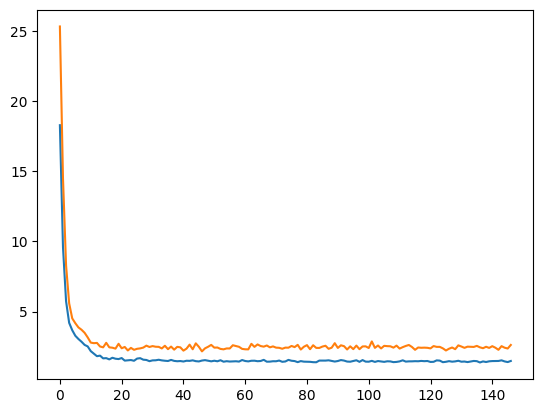

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(2.1119)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(0.4440)


In [21]:
print(vi.h_min_tilde)

-6.16211


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.22231074484670968
tensor([-0.1490])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

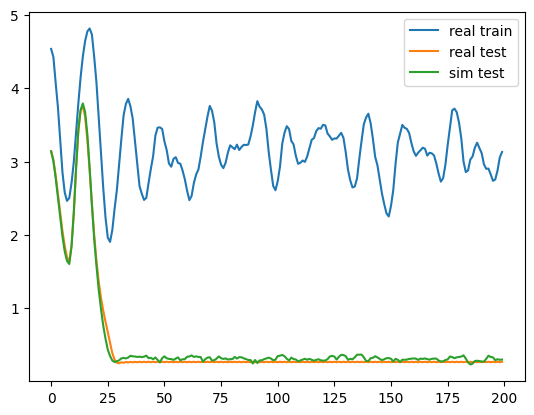

encoder [ 3.0746195 -8.       ]
initial_belief tensor([ 2.9846, -0.8726])
real train tensor([ 3.0715, -8.0076])
real test tensor([ 3.4283, -8.0047])
sim tensor([ 3.0879, -8.0047])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-1.0


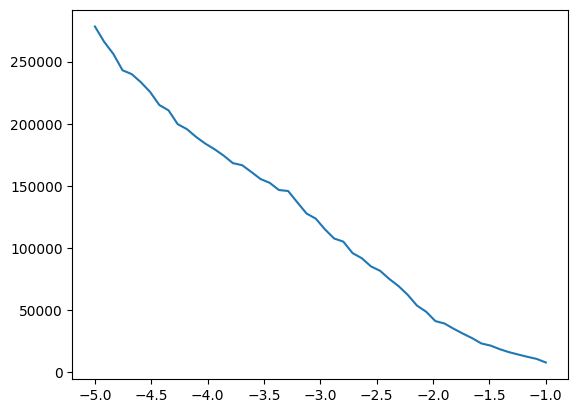

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

1.5516113769845667
tensor([0.2776])
